In [1]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import pandas as pd

def import_excel_data():
    global v, data
    exc_file_path = askopenfilename(filetypes=[("Excel files", ".xlsx .xls")])
    print(exc_file_path)
    v.set(exc_file_path)
    data = pd.read_excel(exc_file_path)
    

root = tk.Tk()
tk.Label(root, text='File Path').grid(row=0, column=0)
v = tk.StringVar()
entry = tk.Entry(root, textvariable=v).grid(row=0, column=1)
tk.Button(root, text='Browse Data Set',command=import_excel_data).grid(row=1, column=0)
tk.Button(root, text='Close',command=root.destroy).grid(row=1, column=1)
root.mainloop()

D:/python/SLM/Копия БД SLM (образец).xlsx


In [2]:
data.head()

,ID,Марка,Группа материала,Класс,Отрасль применения,Область применения,Форма частиц,Cредний размер частиц. мкм (объемное распределение),Шероховатость поверхности. мкм (после построения),Защитная среда,...,Предел прочности. МПа,Температура плавления. ⁰С,Максимальная температура применения составляет. ⁰С,Разница значение осей\nэквивалентного эллипса гранул W. мкм,Площадь\nповерхности гранулы S пов.\nмкм²,Площадь\nпроекции гранулы S экв.\nмкм²,Минимальная рекомендуемая толщина слоя. мкм,Минимальная толщина стенки. мм,Методы изготовления порошка,Фирмы производители и поставщики
0,1,AlSi10Mg (DE),Металл,Алюминиевый сплав,Аэрокосмическая отрасль. \nавтомобильная промы...,Изготовление тонкостенных деталей с невысокой ...,Сфероидная. характерно наличие мелких сателлит...,39.62,Ra 15 — 19\n Rz 30 — 40,аргон,...,397.0,590.0,500,2.0,49.199,46.612,30.0,0.4,Electrode Induction Guide Inert Gas Atomizatio...,Concept Laser (DE). EOS (DE). \nSLM Solution (...
1,2,316L (US),Металл,Нержавеющая сталь,Авиастроение.\n пищевая промышленность. \nхими...,Изготовление металлических рам для морской и ...,Сфероидная. характерно наличие мелких сателлит...,36.19,Ra 13 — 5 \nRz 80 — 20,азот,...,580.0,1440.0,550,1.0,35.912,34.712,25.0,0.4,Vacuum Induction Melt Inert Gas Atomization (V...,3D Systems (US). Realizer (DE).\n Phenix Syst...
2,3,Ti6Al4V (JP),Металл,Титановый сплав,Технология машиностроения. \nмедицина. \nавтом...,Изготовление биомеханических протезов и детале...,Сфероидная. характерно наличие мелких сателлит...,24.86,Ra 15 — 19\n Rz 96 — 115,аргон,...,570.0,1600.0,400,1.0,48.182,42.231,20.0,0.4,Electrode Induction Guide Inert Gas Atomizatio...,Concept Laser (DE). SLM Solutions (DE). \nRay...
3,4,Inconel 718 (US),Металл,Никельхромовый сплав,Ракетнокосмическая промышленность. авиастроение\n,Изготовление турбин и \nракетных двигателей,Сфероидная. характерно наличие мелких сателлит...,44.56,Ra 10 — 15\n Rz 50 — 90,азот,...,1200.0,1260.0,704,1.0,48.673,43.198,20.0,0.3,Vacuum Induction Melt Inert Gas Atomization (V...,Special Metals Corporation (US). \nSLM Solut...
4,5,PA12 (DE),Полимер,Полиамид,Электротехническая. радиотехническая. автомоб...,Трубки. фитинги. шланги. штуцеры. крышки,Сфероидная. характерно наличие мелких сателлит...,38.51,Ra 10 — 11\n Rz 30 — 50,нет,...,100.0,178.0,120,1.0,38.911,35.129,30.0,0.8,Vacuum Induction Melt Inert Gas Atomization (V...,Hangzhou Guozhen Wanxin Coating \nEquipments M...


In [3]:
def infoOut(data,details=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

In [80]:
#выводим таблицу с подсвеченным количеством и процентом пропусков для каждого стобца
def infoT(data):
    infotable = infoOut(data)
    perc = np.round(infoTable['Non-Null Count']/max(infoTable['Non-Null Count'])*100, 2)
    infotable['Non-Null_percent'] = perc
    infoTableGrad = infotable.style.background_gradient(subset = 'Non-Null_percent')
    #infoTableDf = infoTableGrad.data
    return infoTableGrad#infoTableDf

In [5]:
infoTable = infoOut(data)

In [60]:
import numpy as np
perc = np.round(infoTable['Non-Null Count']/max(infoTable['Non-Null Count'])*100, 2)

In [61]:
infoTable['Non-Null_percent'] = perc

In [63]:
infoTableGrad = infoTable.style.background_gradient(subset = 'Non-Null_percent')

In [81]:
infoT(data)

,Column,Non-Null Count,Dtype,Non-Null_percent
0,ID,364,int64,100.000000
1,Марка,364,object,100.000000
2,Группа материала,364,object,100.000000
3,Класс,364,object,100.000000
4,Отрасль применения,94,object,25.820000
5,Область применения,99,object,27.200000
6,Форма частиц,63,object,17.310000
7,Cредний размер частиц. мкм (объемное распределение),77,object,21.150000
8,Шероховатость поверхности. мкм (после построения),63,object,17.310000
9,Защитная среда,74,object,20.330000


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table  # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

#table(ax, infoT(data))  # where df is your data frame

#plt.savefig('mytable.png')

In [38]:
from PIL import Image
import uuid

def save_image(picture):
    filename = uuid.uuid4().hex
    picture.savefig(f'D:/python/SLM/temp/{filename}.png')

In [45]:
import random

random_list = []
for i in np.arange(1,100):
    random_list.append(random.random())
df = pd.DataFrame(random_list)


In [101]:
import matplotlib.pylab as plt

ind_list = [3,6,7,8]
#df.iloc[ind_list]

#гистограмма распределений по классам
def class_hist(data):
    for idx in ind_list:
        hist_class = data.iloc[:, idx].value_counts().plot(kind='barh', title = data.columns[idx])
        fig = hist_class.get_figure()
        filename = uuid.uuid4().hex
        fig.savefig(f'D:/python/SLM/temp/{filename}.png')
    return hist_class

<AxesSubplot:title={'center':'Шероховатость поверхности. мкм (после построения)'}>

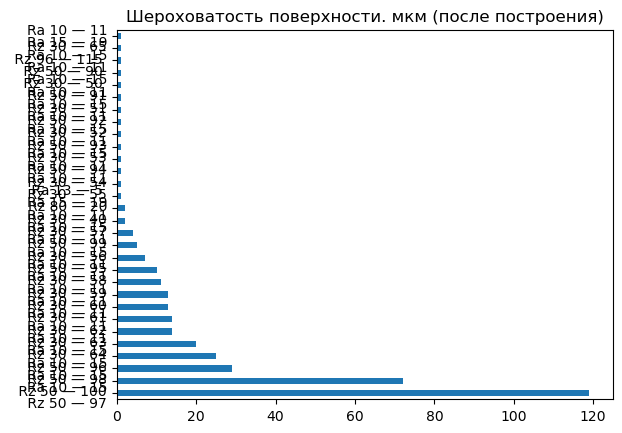

In [102]:
class_hist(data)

In [111]:
import matplotlib.pylab as plt
import plotly 

ind_list = [9,15,7,8]
#df.iloc[ind_list]

#гистограмма распределений по классам
def class_hist_all(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    for idx in ind_list:
        hist_class = data.iloc[:, idx].value_counts().plot(kind='barh', title = data.columns[idx])
        fig = hist_class.get_figure()
        fig.tight_layout()
        axes = fig.subplots(nrows=2, ncols=2)
    filename = uuid.uuid4().hex
    fig.savefig(f'D:/python/SLM/temp/{filename}.png')
    return hist_class

<AxesSubplot:title={'center':'Шероховатость поверхности. мкм (после построения)'}>

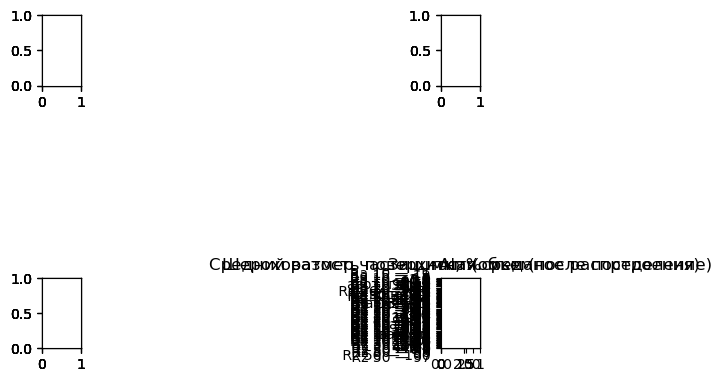

In [112]:
class_hist_all(data)

In [134]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

ind_list = [9,5,7,3]
#гистограмма распределений по классам
def class_hist_all(data):
    #fig = make_subplots( rows=1, cols=4)
    for idx in ind_list:
        hist_class = px.histogram(data.iloc[:, idx], x=data.columns[idx])
        #fig.add_trace(hist_class, 1, )
        #fig.tight_layout()
        #axes = fig.subplots(nrows=2, ncols=2)
        filename = uuid.uuid4().hex
        hist_class.write_image(f'D:/python/SLM/temp/{filename}.png')
    return hist_class

In [135]:
class_hist_all(data)

In [87]:
#строим матрицу корреляций
import seaborn as sns

def corr(data):
    corr_map = sns.heatmap(data.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True)
    fig = corr_map.get_figure()
    filename = uuid.uuid4().hex
    fig.savefig(f'D:/python/SLM/temp/{filename}.png')
    return corr_map

<AxesSubplot:>

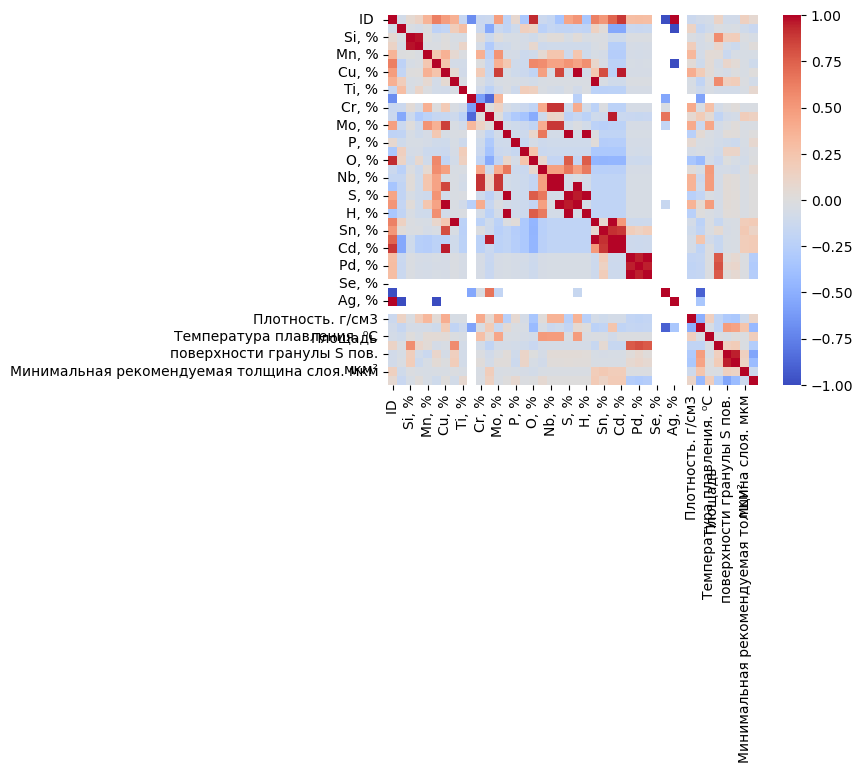

In [88]:
corr(data)

In [89]:
#гистограмма распределения предела прочности
def stress_hist(data):
    sns_plot = sns.histplot(data['Предел прочности. МПа'], kde=True)
    fig = sns_plot.get_figure()
    filename = uuid.uuid4().hex
    fig.savefig(f'D:/python/SLM/temp/{filename}.png')
    return sns_plot


<AxesSubplot:xlabel='Предел прочности. МПа', ylabel='Count'>

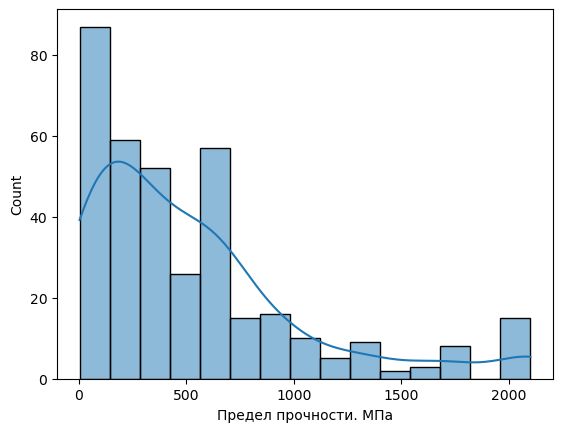

In [90]:
stress_hist(data)

In [ ]:
#гистограмма распределения предела прочности
def stress_hist(data):
    sns_plot = sns.histplot(data['Предел прочности. МПа'], kde=True)
    fig = sns_plot.get_figure()
    filename = uuid.uuid4().hex
    fig.savefig(f'D:/python/SLM/temp/{filename}.png')
    return sns_plot
